In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input, Model

In [3]:
data = pd.read_excel('../data/ENB2012_data.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
# create training and validation splits
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)
# display(df_train.head())

# split features and target
X_train = df_train.drop(['Y1', 'Y2'], axis = 1)
X_valid = df_valid.drop(['Y1', 'Y2'], axis = 1)
y_train = df_train[['Y1', 'Y2']]
y_valid = df_valid[['Y1', 'Y2']]

In [7]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [8]:
from tensorflow.keras import *
from tensorflow.keras.layers import Dense

In [9]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(5, activation="relu")(inputs)
x = Dense(5, activation="relu")(x)

output1 = Dense(1)(x)
output2 = Dense(1)(x)

model = Model(inputs=inputs, outputs=[output1, output2])
model.compile(loss=["mae", "mae"], optimizer="adam")

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0,
)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            45          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 5)            30          ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            6           ['dense_1[0][0]']                
                                                                                              

In [11]:
history_df = pd.DataFrame(history.history)
history_df

,loss,dense_2_loss,dense_3_loss,val_loss,val_dense_2_loss,val_dense_3_loss
0,138.014633,121.745865,16.268772,109.404129,96.987625,12.416497
1,102.202141,89.491447,12.710688,78.244560,67.128990,11.115571
2,76.418449,64.432915,11.985547,60.135921,49.786552,10.349369
3,61.236496,50.366711,10.869782,50.111916,40.609909,9.502008
4,51.357811,41.186462,10.171341,43.820694,34.556469,9.264226
...,...,...,...,...,...,...
295,7.877596,3.946331,3.931264,8.146886,4.076501,4.070385
296,7.881793,3.949900,3.931891,8.145887,4.077438,4.068450
297,7.831697,3.925446,3.906250,8.196042,4.097931,4.098111
298,7.951825,3.983526,3.968299,8.141534,4.069864,4.071669


minimum validation loss: 8.131815910339355


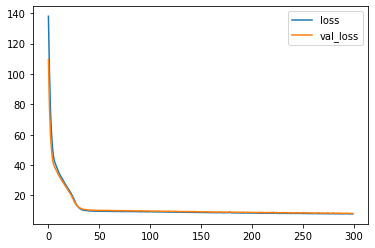

In [12]:
history_df.loc[:, ['loss', 'val_loss']].plot()
print('minimum validation loss: {}'.format(history_df['val_loss'].min()))

In [13]:
y_valid_hat = model.predict(X_valid)
print(y_valid_hat[0][:5])
print(y_valid_hat[1][:5])

[[23.906748 ]
 [24.28874  ]
 [30.159452 ]
 [35.787277 ]
 [ 6.3005033]]
[[23.89486 ]
 [24.267414]
 [29.993086]
 [35.858532]
 [ 6.723592]]


In [16]:
y_valid[:5]

,Y1,Y2
9,19.95,21.97
11,18.31,27.87
19,28.75,39.44
23,23.93,29.40
24,6.07,10.90
